# Pokemon Dataset

In this dataset, we will be exploring a dataset that contains every Pokemon and the information known about each one. The goal of this project is to predict the pokemons primary type using selected features and inputting them into two ML classification algorithms, K-Nearest Neighbor and Naive Bayes.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Brief Exploration of the Dataset

In [ ]:
poke_df = pd.read_csv('pokedex.csv')
poke_df.head(20)

,name,generation,status,type_number,type_1,type_2,height_m,weight_kg,total_points,hp,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,Bulbasaur,1,Normal,2,Grass,Poison,0.7,6.9,318,45,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,1,Normal,2,Grass,Poison,1.0,13.0,405,60,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,1,Normal,2,Grass,Poison,2.0,100.0,525,80,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,Mega Venusaur,1,Normal,2,Grass,Poison,2.4,155.5,625,80,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,Charmander,1,Normal,1,Fire,none,0.6,8.5,309,39,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
5,Charmeleon,1,Normal,1,Fire,none,1.1,19.0,405,58,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,Charizard,1,Normal,2,Fire,Flying,1.7,90.5,534,78,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
7,Mega Charizard X,1,Normal,2,Fire,Dragon,1.7,110.5,634,78,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0
8,Mega Charizard Y,1,Normal,2,Fire,Flying,1.7,100.5,634,78,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,Squirtle,1,Normal,1,Water,none,0.5,9.0,314,44,...,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0


#### Pokedex Data:

* name: The English name of the Pokemon
* generation: The numbered generation which the Pokemon was first introduced
* status: Denoting whether the Pokemon is Normal, Legendary, Mythical, or Sub-Legendary
* type_number: Number of types that the Pokemon has
* type_1: The Primary Type of the Pokemon
* type_2: The Secondary Type of the Pokemon if it has it
* height_m: Height of the Pokemon in meters
* weight_kg: The Weight of the Pokemon in kilograms

#### Base stats:

* total_points: Total number of Base Points
* hp: The Base HP of the Pokemon
* attack: The Base Attack of the Pokemon
* defense: The Base Defense of the Pokemon
* sp_attack: The Base Special Attack of the Pokemon
* sp_defense: The Base Special Defense of the Pokemon
* speed: The Base Speed of the Pokemon

#### Training:

* catch_rate: Catch Rate of the Pokemon
* base_friendship: The Base Friendship of the Pokemon
* base_experience: The Base experience of a wild Pokemon when caught

#### Breeding:

* percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.

#### Type defenses:

* against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type

[1]

In [ ]:
poke_df.shape

(1028, 37)

As shown above, there are 37 features, and 1028 data samples

In [ ]:
poke_df.isna().sum()

name                  0
generation            0
status                0
type_number           0
type_1                0
type_2                0
height_m              0
weight_kg             1
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
catch_rate          104
base_friendship     104
base_experience     104
percentage_male     236
against_normal        0
against_fire          0
against_water         0
against_electric      0
against_grass         0
against_ice           0
against_fight         0
against_poison        0
against_ground        0
against_flying        0
against_psychic       0
against_bug           0
against_rock          0
against_ghost         0
against_dragon        0
against_dark          0
against_steel         0
against_fairy         0
dtype: int64

In [ ]:
numNAN = poke_df.isna().sum().sum()
fracNAN = numNAN/(poke_df.shape[0]*poke_df.shape[1])
fracNAN

0.014433694394783888

As shown above, about 1% of the data is missing. This is due to many different factors. A lot of these values are not known, and variables like "percentage_male" have some null values as not all Pokemon have a gender.

<AxesSubplot:>

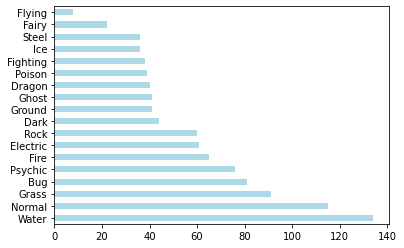

In [ ]:
poke_df['type_1'].value_counts().plot(kind='barh', color='lightblue')

name
['Bulbasaur' 'Ivysaur' 'Venusaur' ... 'Zamazenta Hero of Many Battles'
 'Eternatus' 'Eternatus Eternamax']
generation
[1 2 3 4 5 6 7 8]
status
['Normal' 'Sub Legendary' 'Legendary' 'Mythical']
type_number
[2 1]
type_1
['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison' 'Electric' 'Ground'
 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Dragon'
 'Flying']
type_2
['Poison' 'none' 'Flying' 'Dragon' 'Normal' 'Psychic' 'Steel' 'Ground'
 'Fairy' 'Grass' 'Fighting' 'Electric' 'Ice' 'Dark' 'Ghost' 'Rock' 'Water'
 'Fire' 'Bug']
height_m
[  0.7   1.    2.    2.4   0.6   1.1   1.7   0.5   1.6   0.3   1.4   1.5
   2.2   1.2   3.5   0.4   0.8   1.3   0.9   0.2   1.9   1.8   8.8  10.9
   3.    6.5   2.5   2.1   4.    2.3   9.2  10.5   5.2   3.8  14.5   2.7
   6.2   4.5   9.8   5.    7.   10.8   5.4   4.2   3.7   6.9   3.2   3.3
   0.1   2.6   2.8   2.9   3.6   5.8   8.2   3.9   3.4   5.5   7.5  20.
 100. ]
weight_kg
[6.900e+00 1.300e+01 1.000e+02 1.555e+02 8.500e+00 1.900e+01 9.0

array([[<AxesSubplot:title={'center':'generation'}>,
        <AxesSubplot:title={'center':'type_number'}>,
        <AxesSubplot:title={'center':'height_m'}>,
        <AxesSubplot:title={'center':'weight_kg'}>,
        <AxesSubplot:title={'center':'total_points'}>,
        <AxesSubplot:title={'center':'hp'}>],
       [<AxesSubplot:title={'center':'attack'}>,
        <AxesSubplot:title={'center':'defense'}>,
        <AxesSubplot:title={'center':'sp_attack'}>,
        <AxesSubplot:title={'center':'sp_defense'}>,
        <AxesSubplot:title={'center':'speed'}>,
        <AxesSubplot:title={'center':'catch_rate'}>],
       [<AxesSubplot:title={'center':'base_friendship'}>,
        <AxesSubplot:title={'center':'base_experience'}>,
        <AxesSubplot:title={'center':'percentage_male'}>,
        <AxesSubplot:title={'center':'against_normal'}>,
        <AxesSubplot:title={'center':'against_fire'}>,
        <AxesSubplot:title={'center':'against_water'}>],
       [<AxesSubplot:title={'center':'ag

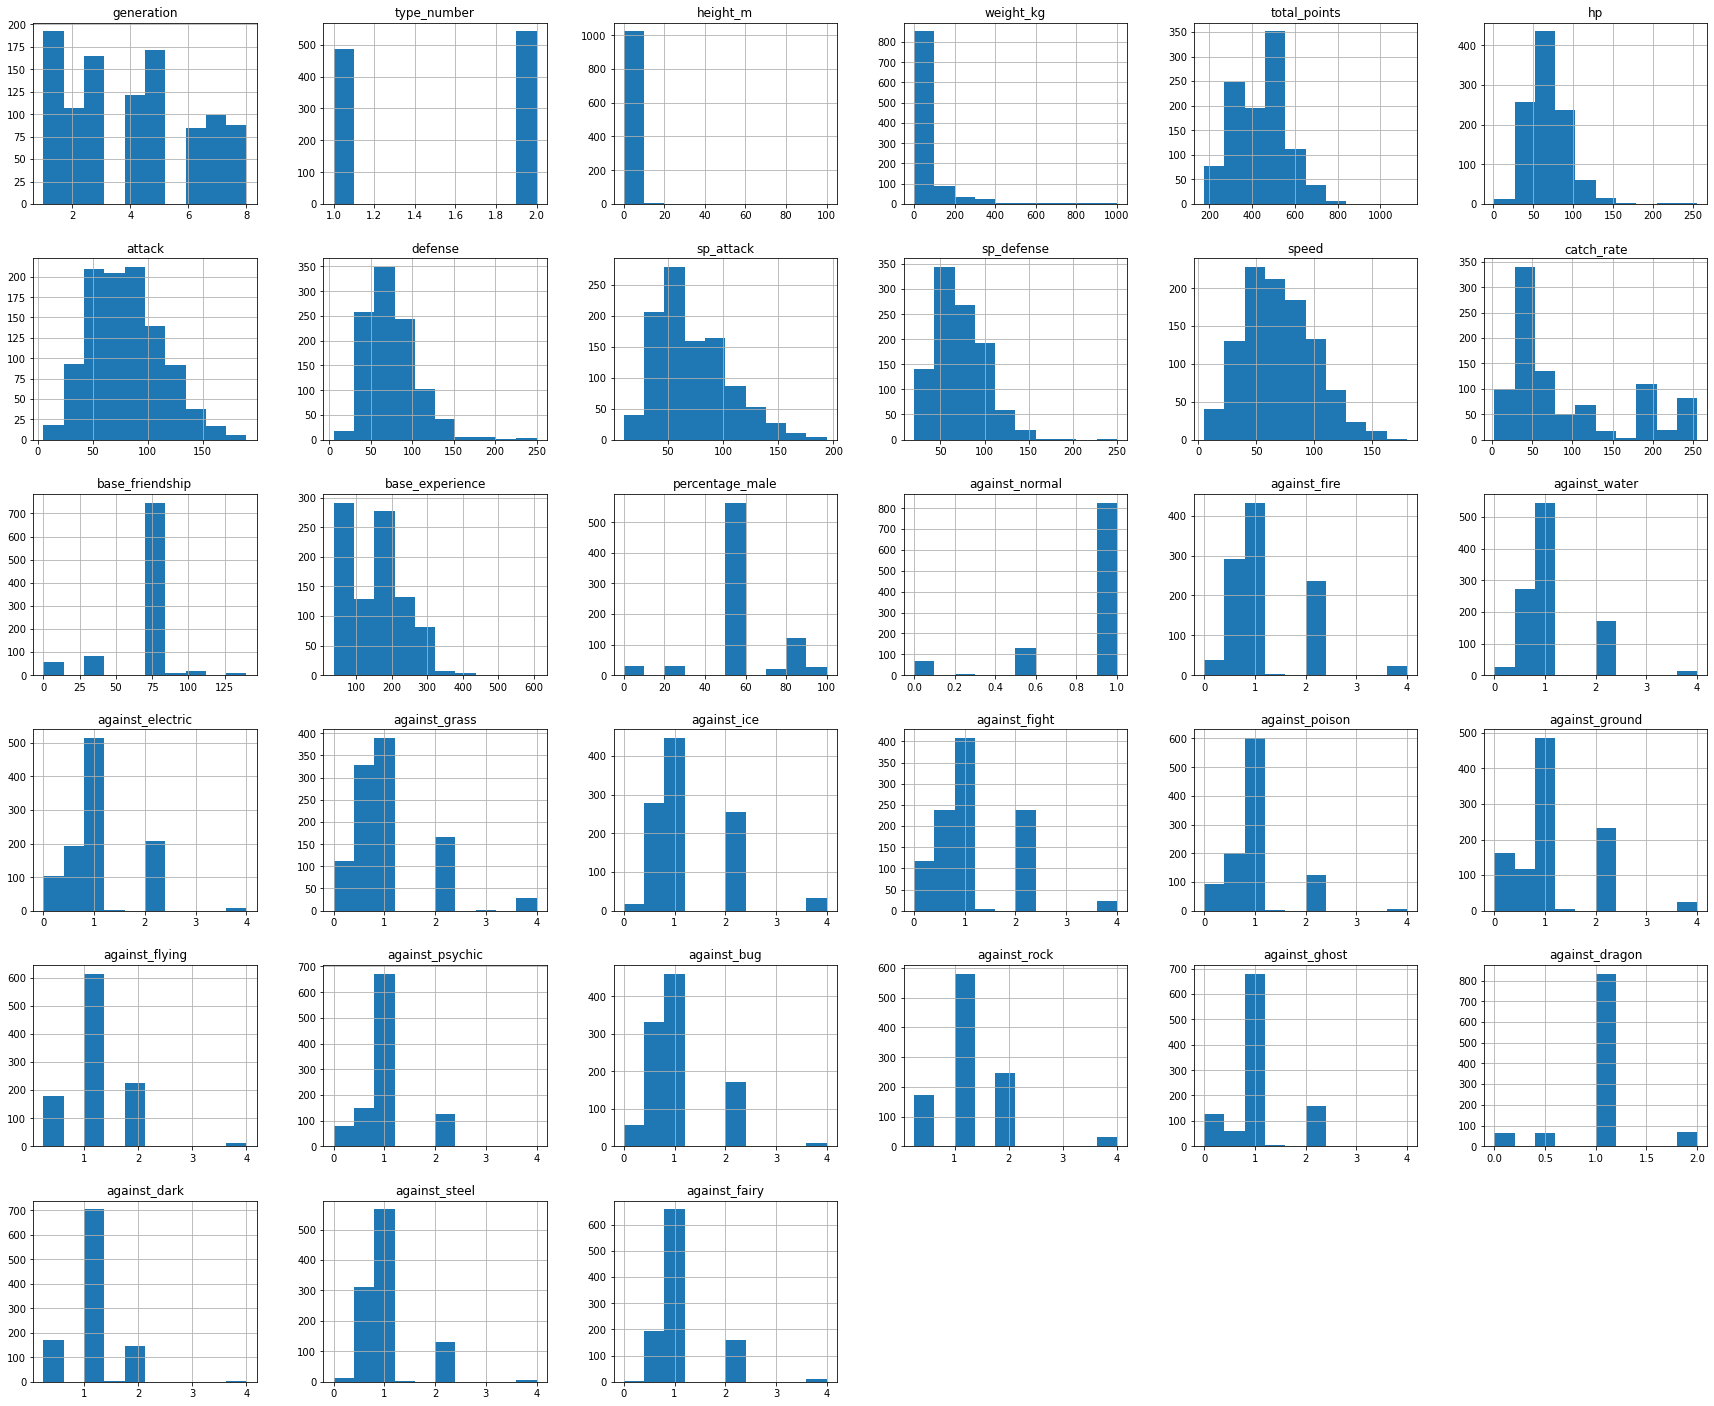

In [ ]:
for col in poke_df.columns:  
 print(col)                  
 print(poke_df[col].unique())
poke_df.hist(figsize=(30, 25)) 

Above shows the unique values in each variable, and histograms to show the distribution of all the numerical data. Above that is a bar chart that shows the amount of each type_1 in the dataset

#### Numerical Variables:

* height_m
* weight_kg
* total_points
* hp
* attack
* defense
* sp_attack
* sp_defense
* speed
* catch_rate
* base_friendship
* base_experience
* percentage_male

#### Discrete Numerical Variables:

* against_? :all 18

#### Categorical Variables:

* generation
* status
* type_number
* type_1 (Dependent Variable)
* type_2

## Pre-Processing of the Dataset

In [ ]:
for x in poke_df.columns:
    if poke_df[x].dtypes != object:
        poke_df[x] = poke_df[x].fillna(poke_df[x].median()) 


For the missing values, we decided to fill them all up with the median value

In [ ]:
poke_df2 = poke_df.copy()
poke_df2 = pd.get_dummies(data=poke_df2, columns=['generation','type_number','status','type_2', 'type_1'])

One_hot encoding of all the categorical variables

## Feature Extraction

<AxesSubplot:>

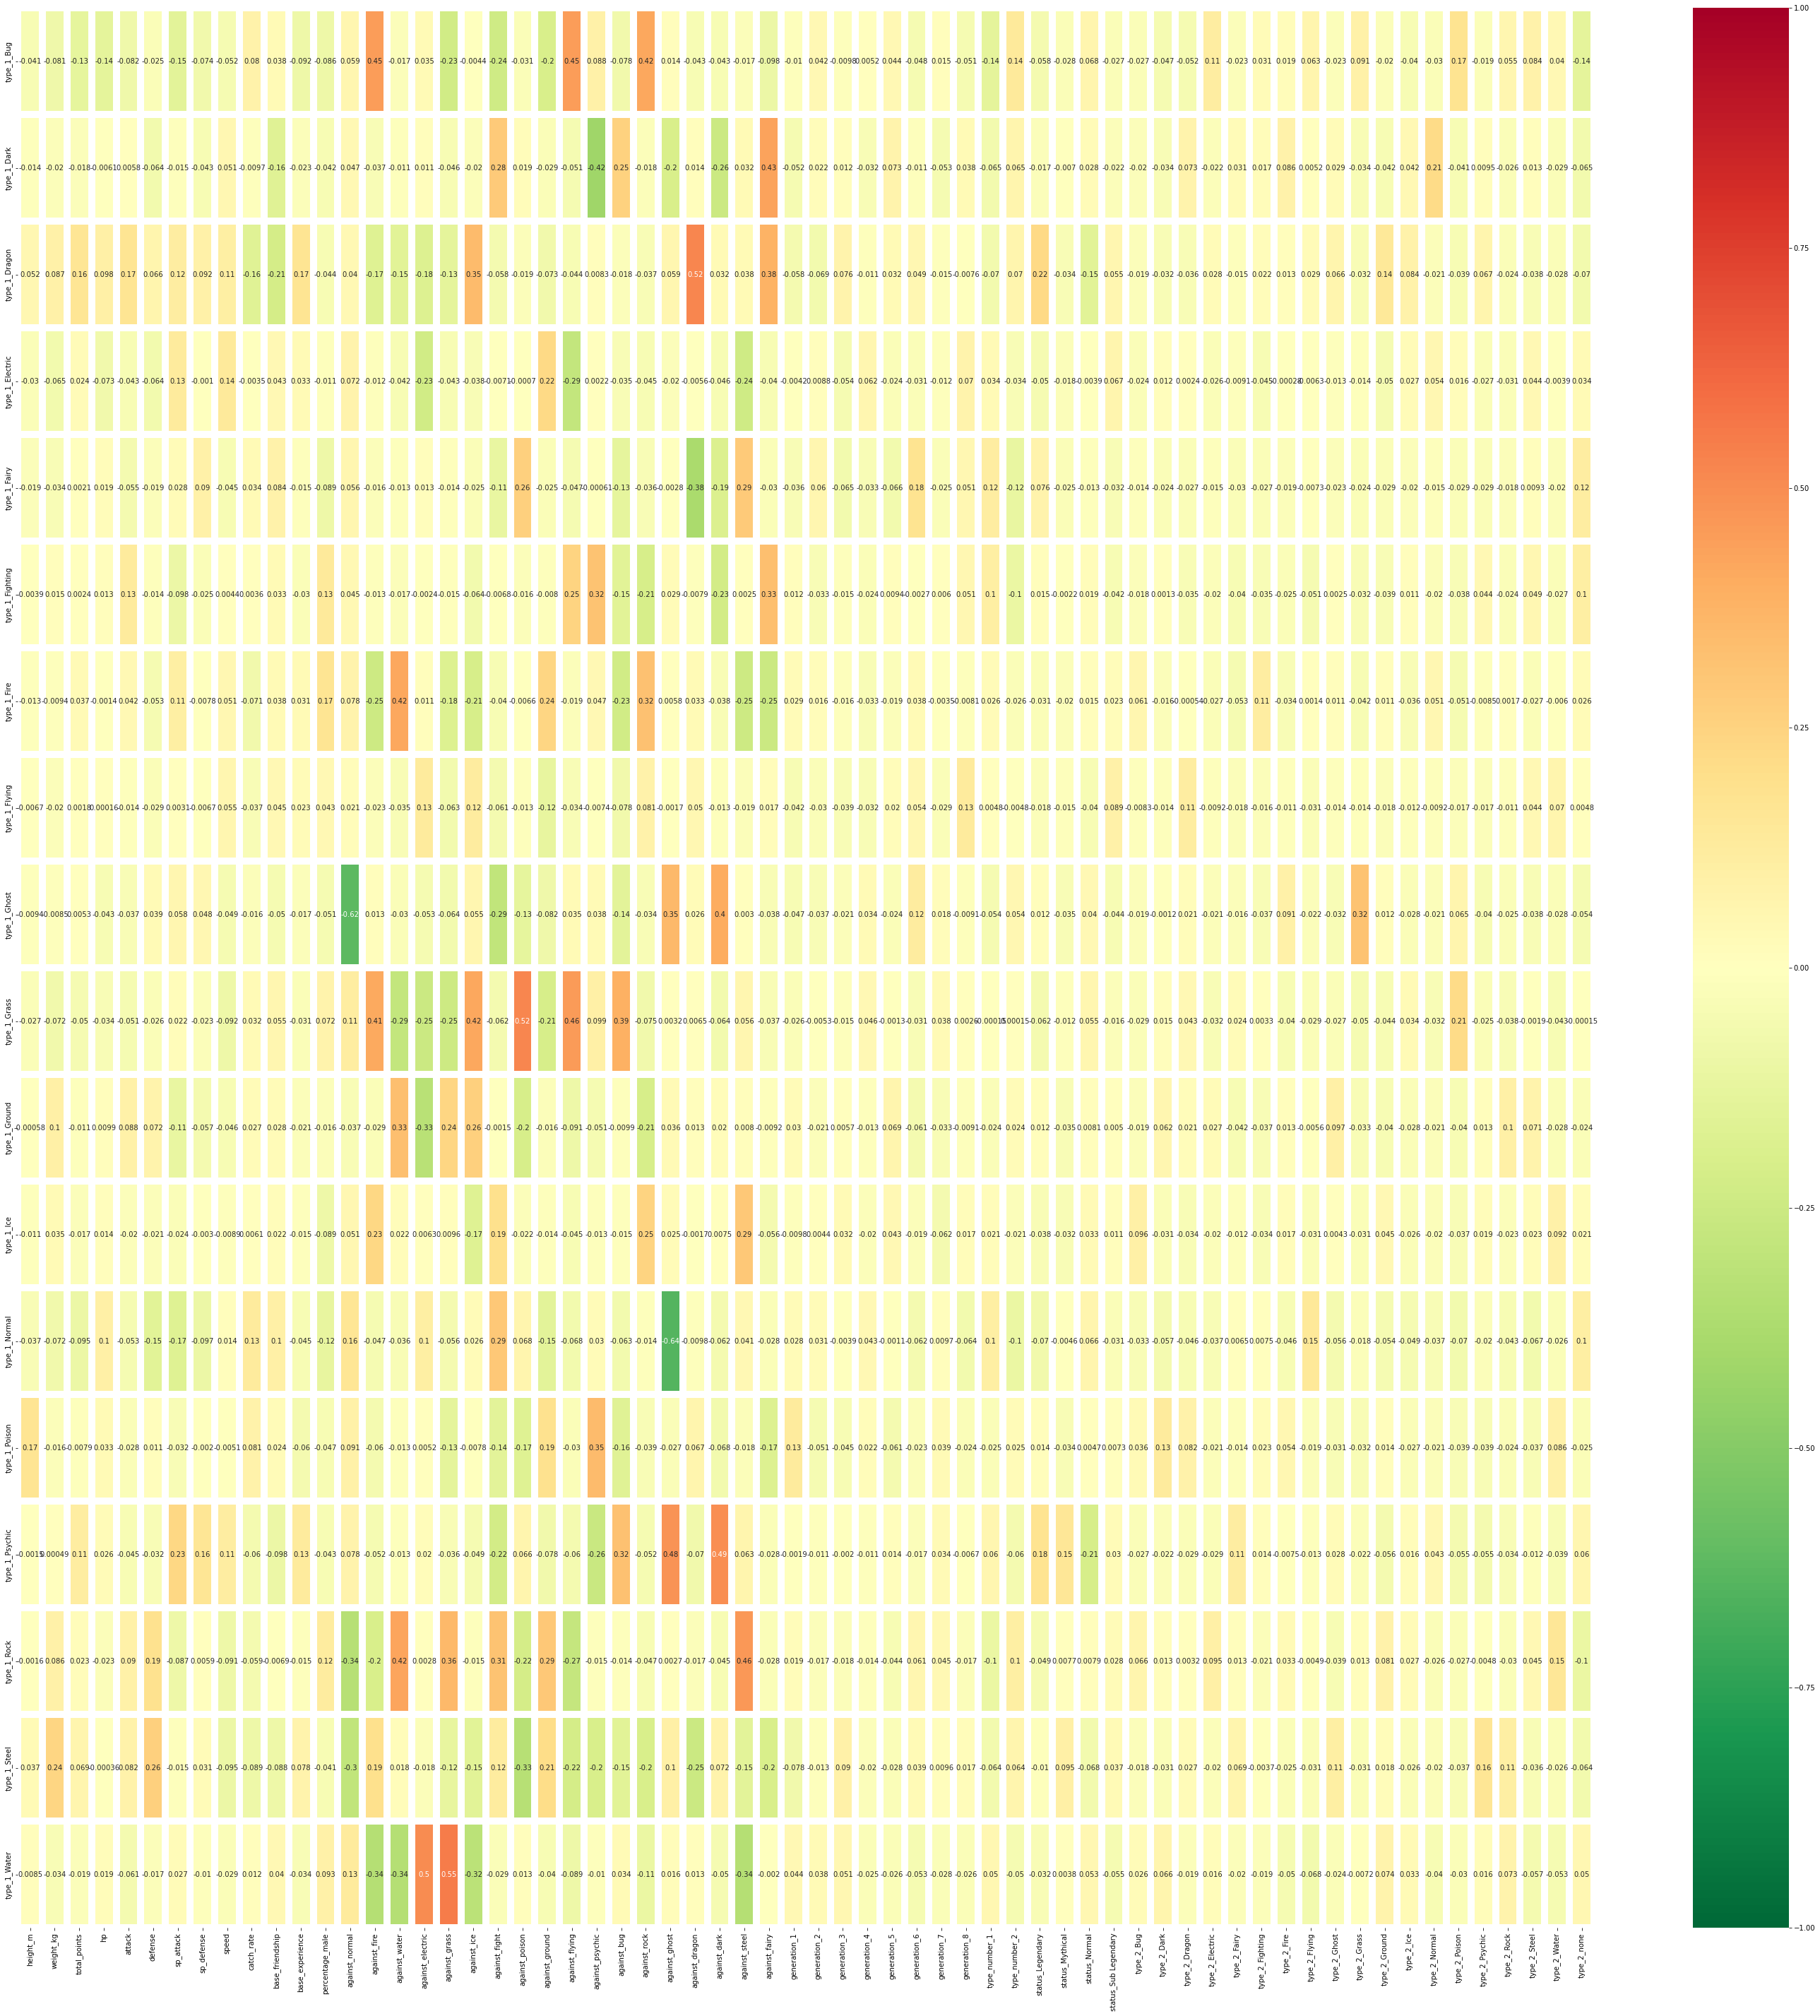

In [ ]:
corr_df = poke_df2.corr(method='pearson')
x_columns = ['height_m', 'weight_kg', 'total_points', 'hp', 'attack',
        'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
        'base_friendship', 'base_experience', 'percentage_male',
        'against_normal', 'against_fire', 'against_water', 'against_electric',
        'against_grass', 'against_ice', 'against_fight', 'against_poison',
        'against_ground', 'against_flying', 'against_psychic', 'against_bug',
        'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
        'against_steel', 'against_fairy', 'generation_1', 'generation_2',
        'generation_3', 'generation_4', 'generation_5', 'generation_6',
        'generation_7', 'generation_8', 'type_number_1', 'type_number_2',
        'status_Legendary', 'status_Mythical', 'status_Normal',
        'status_Sub Legendary', 'type_2_Bug', 'type_2_Dark', 'type_2_Dragon',
        'type_2_Electric', 'type_2_Fairy', 'type_2_Fighting', 'type_2_Fire',
        'type_2_Flying', 'type_2_Ghost', 'type_2_Grass', 'type_2_Ground',
        'type_2_Ice', 'type_2_Normal', 'type_2_Poison', 'type_2_Psychic',
        'type_2_Rock', 'type_2_Steel', 'type_2_Water', 'type_2_none']
y_columns = ['type_1_Bug',
        'type_1_Dark', 'type_1_Dragon', 'type_1_Electric', 'type_1_Fairy',
        'type_1_Fighting', 'type_1_Fire', 'type_1_Flying', 'type_1_Ghost',
        'type_1_Grass', 'type_1_Ground', 'type_1_Ice', 'type_1_Normal',
        'type_1_Poison', 'type_1_Psychic', 'type_1_Rock', 'type_1_Steel',
        'type_1_Water']
corr2 = corr_df.loc[x_columns, y_columns]

fig = plt.figure(figsize=(50, 50))

# create a heatmap from the masked correlations, using the figure as the plot
sns.heatmap(corr_df.loc[y_columns, x_columns], cmap='RdYlGn_r', vmax=1.0, vmin=-1.0, linewidths=10, 
            annot=True, annot_kws={"size": 10}, ax=fig.gca())


In [ ]:
corr2.describe()

,type_1_Bug,type_1_Dark,type_1_Dragon,type_1_Electric,type_1_Fairy,type_1_Fighting,type_1_Fire,type_1_Flying,type_1_Ghost,type_1_Grass,type_1_Ground,type_1_Ice,type_1_Normal,type_1_Poison,type_1_Psychic,type_1_Rock,type_1_Steel,type_1_Water
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.002103,-0.002581,0.022405,-0.011941,-0.009397,0.003135,-0.000363,0.001154,-0.008770,0.014299,0.000518,0.009112,-0.021913,-0.002365,0.017267,0.018273,-0.014199,-0.007787
std,0.126951,0.109412,0.125306,0.073552,0.089262,0.089255,0.110161,0.047910,0.124841,0.146604,0.092417,0.071465,0.112252,0.081689,0.125791,0.135068,0.118588,0.133440
min,-0.238677,-0.415089,-0.213049,-0.285820,-0.382347,-0.225805,-0.252075,-0.122434,-0.618667,-0.288321,-0.326900,-0.170433,-0.642537,-0.171919,-0.260282,-0.335119,-0.334281,-0.343622
25%,-0.053836,-0.034794,-0.038187,-0.038524,-0.030535,-0.027556,-0.031222,-0.020459,-0.038681,-0.038544,-0.032832,-0.022498,-0.061787,-0.034696,-0.043451,-0.027153,-0.064949,-0.040007
50%,-0.022719,-0.014128,0.000356,-0.011603,-0.019794,-0.007330,-0.004747,-0.011818,-0.021197,-0.015723,-0.009145,-0.009375,-0.034679,-0.018149,-0.010996,-0.003186,-0.018119,-0.017677
75%,0.040767,0.023818,0.067824,0.013057,0.003877,0.013757,0.031736,0.017897,0.022114,0.032557,0.024577,0.021230,0.026494,0.023237,0.047185,0.044916,0.065043,0.028394
max,0.447878,0.430636,0.519506,0.219566,0.286318,0.330120,0.420630,0.132627,0.400344,0.519558,0.330855,0.291397,0.290122,0.345024,0.494856,0.463289,0.261281,0.550089


Above shows a heat map highlighting the correlations between each independent variable and the type_1 label. We did this to find variables that have a low correlation that might throw off our prediction. Since none of the correlations are significantly high, we are going to decide a threshold where we want to choose our features.

In [ ]:
threshold = 0.2  
selected_features = {} 

for label in corr2.columns:
    strong_corr = corr2[(corr2[label] > threshold) | (corr2[label] < -threshold)]
    selected_features[label] = strong_corr.index.tolist()
    print(label)
    print(selected_features[label])

type_1_Bug
['against_fire', 'against_grass', 'against_fight', 'against_flying', 'against_rock']
type_1_Dark
['against_fight', 'against_psychic', 'against_bug', 'against_dark', 'against_fairy', 'type_2_Normal']
type_1_Dragon
['base_friendship', 'against_ice', 'against_dragon', 'against_fairy', 'status_Legendary']
type_1_Electric
['against_electric', 'against_ground', 'against_flying', 'against_steel']
type_1_Fairy
['against_poison', 'against_dragon', 'against_steel']
type_1_Fighting
['against_flying', 'against_psychic', 'against_rock', 'against_dark', 'against_fairy']
type_1_Fire
['against_fire', 'against_water', 'against_ice', 'against_ground', 'against_bug', 'against_rock', 'against_steel', 'against_fairy']
type_1_Flying
[]
type_1_Ghost
['against_normal', 'against_fight', 'against_ghost', 'against_dark', 'type_2_Grass']
type_1_Grass
['against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_poison', 'against_ground', 'against_flying', 'against_bug',

Above shows the features that exceed the given threshold for each label. Generally the against_? features are the best ones to use in determining the type_1 variable. In some cases, the status and the type_2 are also good predictors. Based on what we see in the dataset, and knowledge of the game, variables like generation, type_number, stat values (hp, attack, etc), height, weight, friendship and experience values, generally have no correlation with the pokemons type. Large number values can really throw off KNN classifier, as well as Naive Bayes. We want to keep the data down to what is important. 

In [ ]:
df = poke_df.copy()
df = df.iloc[:,~poke_df.columns.isin(['height_m','weight_kg','total_points','hp','attack','defense','sp_attack','sp_defense', 'speed','catch_rate', 'base_friendship', 'base_experience', 'percentage_male', 'generation', 'type_number'])]
df = pd.get_dummies(data=df, columns=['status','type_2'])
first_column = df.pop('type_1')
df.insert(0, 'type_1', first_column)
df.shape

(1028, 43)

Above, we took out all of the features that we do not want to use in our classfication due to the nature of the correlation. We believe that a lot of these variables will only throw off our training models, so it would be best not to use them.

## Processing of each dataset using two different machine learning methods

In [ ]:
type_list = list(poke_df['type_1'].unique())

df_test = pd.DataFrame(columns = df.columns)
for i in type_list:
    df_test = df_test.append((df[df['type_1'] == i]).sample(frac=0.20))

/var/folders/_1/8nc9mlsx6qj2q39564gllkpw0000gn/T/ipykernel_13683/61334476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append((df[df['type_1'] == i]).sample(frac=0.20))
/var/folders/_1/8nc9mlsx6qj2q39564gllkpw0000gn/T/ipykernel_13683/61334476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append((df[df['type_1'] == i]).sample(frac=0.20))
/var/folders/_1/8nc9mlsx6qj2q39564gllkpw0000gn/T/ipykernel_13683/61334476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append((df[df['type_1'] == i]).sample(frac=0.20))
/var/folders/_1/8nc9mlsx6qj2q39564gllkpw0000gn/T/ipykernel_13683/61334476.py:5: FutureWarning: The frame.append method is deprecated and will be remove

In [ ]:
df_train = df[~df['name'].isin(df_test['name'])]

In [ ]:
X = df.iloc[:,2:]
y = df.iloc[:,0]

X_train = df_train.iloc[:,2:]
X_test = df_test.iloc[:,2:]

y_train = df_train.iloc[:,0]
y_test = df_test.iloc[:,0]

Above is our train-test-split. We split the data 80-20, and made sure that 20 percent of each label is contained in the testing dataset. 

### K-Nearest Neighbor

In [ ]:
X_trainK = pd.concat([X_train,y_train], axis=1)
X_testK = pd.concat([X_test, y_test], axis=1)
Xk = pd.concat([X, y], axis=1)

In [ ]:
def k_neighbors(train, testrow, k, distance):
    distances = []
    for index,row in train.iterrows():
        test_columns = testrow[:-1]
        row_columns = row[:-1]
        dist = np.linalg.norm(np.subtract(test_columns, row_columns), ord = distance)
        distances.append((row, dist))
    distances.sort(key=lambda c: c[1])
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

def predict_k(train, testrow, k, distance):
    neighbors = k_neighbors(train, testrow, k, distance)
    output = [row[-1] for row in neighbors]
    prediction = max(set(output), key=output.count)
    return prediction


def k_predict_final(train, test, k, distance):
    pred_k = []
    for index, row in test.iterrows():
        y = predict_k(train, row, k, distance)
        pred_k.append(y)
    return pred_k
    


KNN from scratch. k_predict_final takes both datasets and predicts the outcome and returns a list of outcomes.

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
X_trainK2, X_testK2, y_train2, y_test2 = train_test_split(X_trainK, y_train, test_size=0.25, random_state=42)

def KNN_KCV(X, Y, splits, meth):
    if meth:
        kfold = KFold(n_splits=splits, shuffle=True, random_state=42)
        ks = range(1, 11)
        euclidean_train_errors = []
        euclidean_test_errors = []
        euclidean_cv_errors = []
        euclidean_cv_stddevs = []
        manhattan_train_errors = []
        manhattan_test_errors = []
        manhattan_cv_errors = []
        manhattan_cv_stddevs = []

        for k in ks:
            knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', p=2)
    
            fold_errors = []
    
            for train_index, test_index in kfold.split(X):
                x_train, x_test = X.iloc[train_index,:], X.iloc[test_index,:]
                y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
                knn.fit(x_train, y_train)
                y_pred = knn.predict(x_test)
        
                test_error = 1 - accuracy_score(y_test, y_pred)
        
                y_pred = knn.predict(x_train)
        
                train_error = 1 - accuracy_score(y_train, y_pred)
        
                fold_errors.append(test_error)
        
            cv_error = np.mean(fold_errors)
            cv_stddev = np.std(fold_errors)
    
            euclidean_train_errors.append(train_error)
            euclidean_test_errors.append(test_error)
            euclidean_cv_errors.append(cv_error)
            euclidean_cv_stddevs.append(cv_stddev)
            
            knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', p=1)
            
            fold_errors = []
    
            for train_index, test_index in kfold.split(X):
                x_train, x_test = X.iloc[train_index,:], X.iloc[test_index,:]
                y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
                knn.fit(x_train, y_train)
                y_pred = knn.predict(x_test)
        
                test_error = 1 - accuracy_score(y_test, y_pred)
        
                y_pred = knn.predict(x_train)
        
                train_error = 1 - accuracy_score(y_train, y_pred)
        
                fold_errors.append(test_error)
        
            cv_error = np.mean(fold_errors)
            cv_stddev = np.std(fold_errors)
    
            manhattan_train_errors.append(train_error)
            manhattan_test_errors.append(test_error)
            manhattan_cv_errors.append(cv_error)
            manhattan_cv_stddevs.append(cv_stddev)

    else:
        kfold = KFold(n_splits=splits, shuffle=True, random_state=42)
        ks = range(1, 11)
        euclidean_train_errors = []
        euclidean_test_errors = []
        euclidean_cv_errors = []
        euclidean_cv_stddevs = []
        manhattan_train_errors = []
        manhattan_test_errors = []
        manhattan_cv_errors = []
        manhattan_cv_stddevs = []

        for k in ks:    
            fold_errors = []
    
            for train_index, test_index in kfold.split(X):
                x_train, x_test = X.iloc[train_index,:], X.iloc[test_index,:]
                y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
                y_pred = k_predict_final(x_train, x_test, k, 2)
        
                test_error = 1 - accuracy_score(y_test, y_pred)
        
                y_pred = k_predict_final(x_train, x_train, k, 2)
        
                train_error = 1 - accuracy_score(y_train, y_pred)
        
                fold_errors.append(test_error)
        
            cv_error = np.mean(fold_errors)
            cv_stddev = np.std(fold_errors)
    
            euclidean_train_errors.append(train_error)
            euclidean_test_errors.append(test_error)
            euclidean_cv_errors.append(cv_error)
            euclidean_cv_stddevs.append(cv_stddev)
            
            for train_index, test_index in kfold.split(X):
                x_train, x_test = X.iloc[train_index,:], X.iloc[test_index,:]
                y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
                y_pred = k_predict_final(x_train, x_test, k, 1)
        
                test_error = 1 - accuracy_score(y_test, y_pred)
        
                y_pred = k_predict_final(x_train, x_train, k, 1)
        
                train_error = 1 - accuracy_score(y_train, y_pred)
        
                fold_errors.append(test_error)
        
            cv_error = np.mean(fold_errors)
            cv_stddev = np.std(fold_errors)
    
            manhattan_train_errors.append(train_error)
            manhattan_test_errors.append(test_error)
            manhattan_cv_errors.append(cv_error)
            manhattan_cv_stddevs.append(cv_stddev)
    
    fig, ax = plt.subplots()
    plt.figure()
    ax.plot(ks, euclidean_train_errors, label='Euclidean distance: Training error')
    ax.plot(ks, euclidean_test_errors, label='Euclidean distance: Test error')
    ax.errorbar(ks, euclidean_cv_errors, yerr=euclidean_cv_stddevs, label='Euclidean distance: Cross-validation error')
    ax.set_xlabel('k')
    ax.set_ylabel('Error')
    ax.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    plt.figure()
    ax.plot(ks, manhattan_train_errors, label='Manhattan distance: Training error')
    ax.plot(ks, manhattan_test_errors, label='Manhattan distance: Test error')
    ax.errorbar(ks, manhattan_cv_errors, yerr=manhattan_cv_stddevs, label='Manhattan distance: Cross-validation error')
    ax.set_xlabel('k')
    ax.set_ylabel('Error')
    ax.legend()
    plt.show()


The above code shows 10-fold cross validation for both KNN algorithms. One done from scratch, and one done using the sci-kit learn library. We had our original dataset, split into 80-20 train-test-spplit. Then we took the training data and split it again into a 75-25 train-test-split. We then took that training data and performed a 10-fold cv, to choose the best k value to use for KNN. The test2 is our validation set which will compare using manhattan distance versus euclidian distance. 

[3]

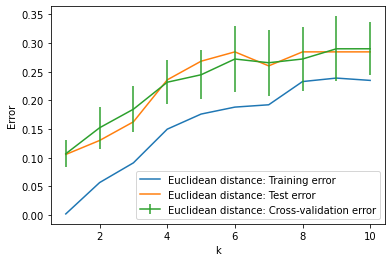

<Figure size 432x288 with 0 Axes>

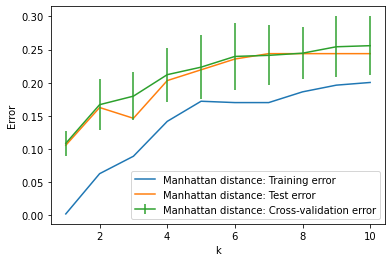

<Figure size 432x288 with 0 Axes>

In [ ]:
KNN_KCV(X_train2, y_train2, 5, 1)

The above plots are the training error, test error, and average cv error for the sci-kit learn KNN algorithm for both euclidian and manhattan distance. 

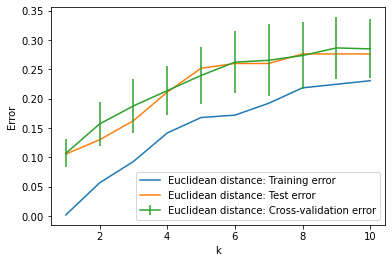

<Figure size 432x288 with 0 Axes>

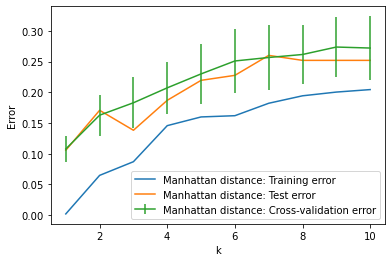

<Figure size 432x288 with 0 Axes>

In [ ]:
KNN_KCV(X_trainK2, y_train2, 5, 0)

The above plots are the training error, test error, and average cv error for our KNN algorithm for both euclidian and manhattan distance. 

It it clear to see that the best k value to use in both cases is k=1. As they both have the lowest average cv error. k=1 will be used for our validation set

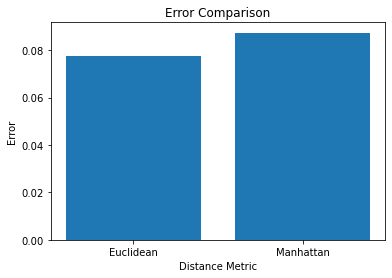

In [ ]:
knn_euc = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='brute', p=2)
knn_euc.fit(X_train2, y_train2)

pred_euc = knn_euc.predict(X_test2)

euc_error = 1 - accuracy_score(y_test2, pred_euc)

knn_man = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='brute', p=1)
knn_man.fit(X_train2, y_train2)

pred_man = knn_man.predict(X_test2)

man_error = 1 - accuracy_score(y_test2, pred_man)

x_values = ['Euclidean', 'Manhattan']

# Set the y-values for the bar plot
y_values = [euc_error, man_error]

# Create the bar plot
plt.bar(x_values, y_values)

# Add a title and labels for the x and y axes
plt.title('Error Comparison')
plt.xlabel('Distance Metric')
plt.ylabel('Error')

# Show the plot
plt.show()

This is the comparison between errors of using manhattan distance versus euclidian distance on the sci-kit learn KNN. Euclidian performs slightly better

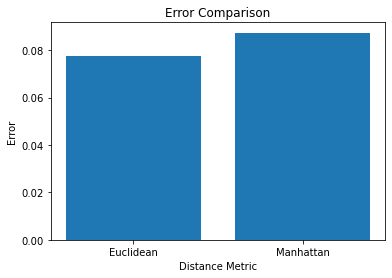

In [ ]:
pred_euc2 = k_predict_final(X_trainK2, X_testK2, 1, 2)
euc_error2 = 1 - accuracy_score(y_test2, pred_euc2)

pred_man2 = k_predict_final(X_trainK2, X_testK2, 1, 1)
man_error2 = 1 - accuracy_score(y_test2, pred_man2)


x_values = ['Euclidean', 'Manhattan']

# Set the y-values for the bar plot
y_values = [euc_error, man_error]

# Create the bar plot
plt.bar(x_values, y_values)

# Add a title and labels for the x and y axes
plt.title('Error Comparison')
plt.xlabel('Distance Metric')
plt.ylabel('Error')

# Show the plot
plt.show()

This is the comparison between errors of using manhattan distance versus euclidian distance on our KNN. Euclidian performs slightly better

In [ ]:
knn_man = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='brute', p=2)
knn_man.fit(X_train, y_train)

predK = knn_man.predict(X_test)
acck = accuracy_score(y_test, predK)
acck

0.9463414634146341

In [ ]:
predK2 = k_predict_final(X_trainK, X_testK, 1, 2)
acck2 = accuracy_score(y_test, predK2)
acck2

0.9463414634146341

Both algorithms yeild an accuracy of about 94.6% on the original training and test data. sci-kit learn's algorithms yeild the same exact results as our algorithm. 

### Naive Bayes

In [ ]:
from collections import defaultdict


def calc_class_prior(y_train):
    class_priors = {}
    for outcome in np.unique(y_train):
        outcome_count = sum(y_train == outcome)
        class_priors[outcome] = outcome_count / y_train.shape[0]
    return class_priors

def calc_likelihoods(X_train, y_train):
    likelihoods = defaultdict(lambda: defaultdict(int))
    for feature in list(X_train.columns):
        for outcome in np.unique(y_train):
            outcome_count = sum(y_train == outcome)
            feat_likelihood = X_train[feature][y_train[y_train == outcome].index.values.tolist()].value_counts().to_dict()
            for feat_val, count in feat_likelihood.items():
                likelihoods[feature][feat_val, '_', outcome] = count/outcome_count
    return likelihoods

def calc_predictor_prior(X_train):
    pred_priors = defaultdict(lambda: defaultdict(int))
    for feature in list(X_train.columns):
        feat_vals = X_train[feature].value_counts().to_dict()
        for feat_val, count in feat_vals.items():
            pred_priors[feature][feat_val] = count/X_train.shape[0]
    return pred_priors

def predict(X_train, X_test, y_train):
    results = []
    X = np.array(X_test)
    class_priors = calc_class_prior(y_train)
    likelihoods = calc_likelihoods(X_train, y_train)
    pred_priors = calc_predictor_prior(X_train)
    k = 1
    for query in X:
        probs_outcome = {}
        for outcome in np.unique(y_train):
            prior = class_priors[outcome]
            likelihood = 1
            evidence = 1

            for feat, feat_val in zip(list(X_train.columns), query):
                likelihood *= likelihoods[feat][feat_val ,'_', outcome]
                evidence *= pred_priors[feat][feat_val]

            evidence += k
            posterior = (likelihood * prior) / (evidence)

            probs_outcome[outcome] = posterior

        result = max(probs_outcome, key = lambda x: probs_outcome[x])
        results.append(result)

    return np.array(results)

predNB = predict(X_train, X_test, y_train)
accNB = accuracy_score(predNB, y_test)               
accNB
                

0.9024390243902439

Above shows the Naive Bayes algorithm which works by calculating the class priors, calculating the likelihood of each feature, and calculating the predictor prior. It calculates the probability that a sample is all of the labels, and outputs the highest probability. There is no parameter tuning that needs to be put in place here, so cross validation was not performed. On our original train-test-split, the algorithm predicts with an accuracy of 90.2%

[7]

## Comparative analysis of the two methods

### Error

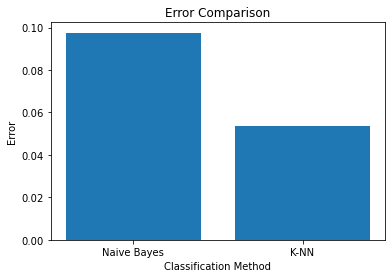

In [ ]:
x_values = ['Naive Bayes', 'K-NN']

# Set the y-values for the bar plot
y_values = [1 - accNB, 1- acck2]

# Create the bar plot
plt.bar(x_values, y_values)

# Add a title and labels for the x and y axes
plt.title('Error Comparison')
plt.xlabel('Classification Method')
plt.ylabel('Error')

# Show the plot
plt.show()

### Computational Complexity

Performing KNN from scratch is very computationally intensive. The training and predicting take a few minutes to perform, and the k-fold cross validation took hours to perform. If you are not using the sci-kit learn library, KNN is not a good method to use in terms of its computational complexity. Although KNN does have a higher accuracy than NB in this case, NB is much quicker to perform, and does not require any parameter tuning. So in terms of computational complexity, NB has the upper hand.

### Confusion Matrices

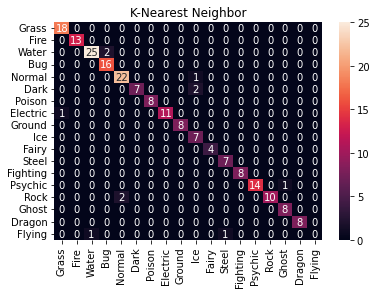

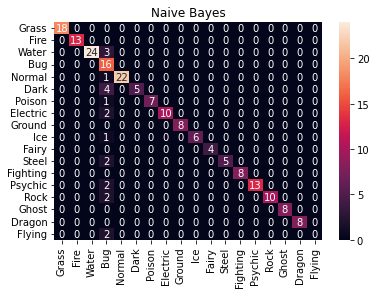

In [ ]:
label_to_int = {label: i for i, label in enumerate(y_test.unique())}

num_classes = len(label_to_int)
confusion_matrixKNN = [[0] * num_classes for i in range(num_classes)]

for true_class, predicted_class in zip(y_test, predK2):
    true_int = label_to_int[true_class]
    pred_int = label_to_int[predicted_class]
    confusion_matrixKNN[true_int][pred_int] += 1

class_labels = list(label_to_int.keys())

sns.heatmap(confusion_matrixKNN, xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('K-Nearest Neighbor')

plt.show()

confusion_matrixNB = [[0] * num_classes for i in range(num_classes)]

for true_class, predicted_class in zip(y_test, predNB):
    true_int = label_to_int[true_class]
    pred_int = label_to_int[predicted_class]
    confusion_matrixNB[true_int][pred_int] += 1

class_labels = list(label_to_int.keys())

sns.heatmap(confusion_matrixNB, xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('Naive Bayes')

plt.show()

Confusion matrices for both KNN and NB

/var/folders/_1/8nc9mlsx6qj2q39564gllkpw0000gn/T/ipykernel_13683/1953348141.py:22: RuntimeWarning: invalid value encountered in long_scalars
  precision.append(TP/(TP+FP))


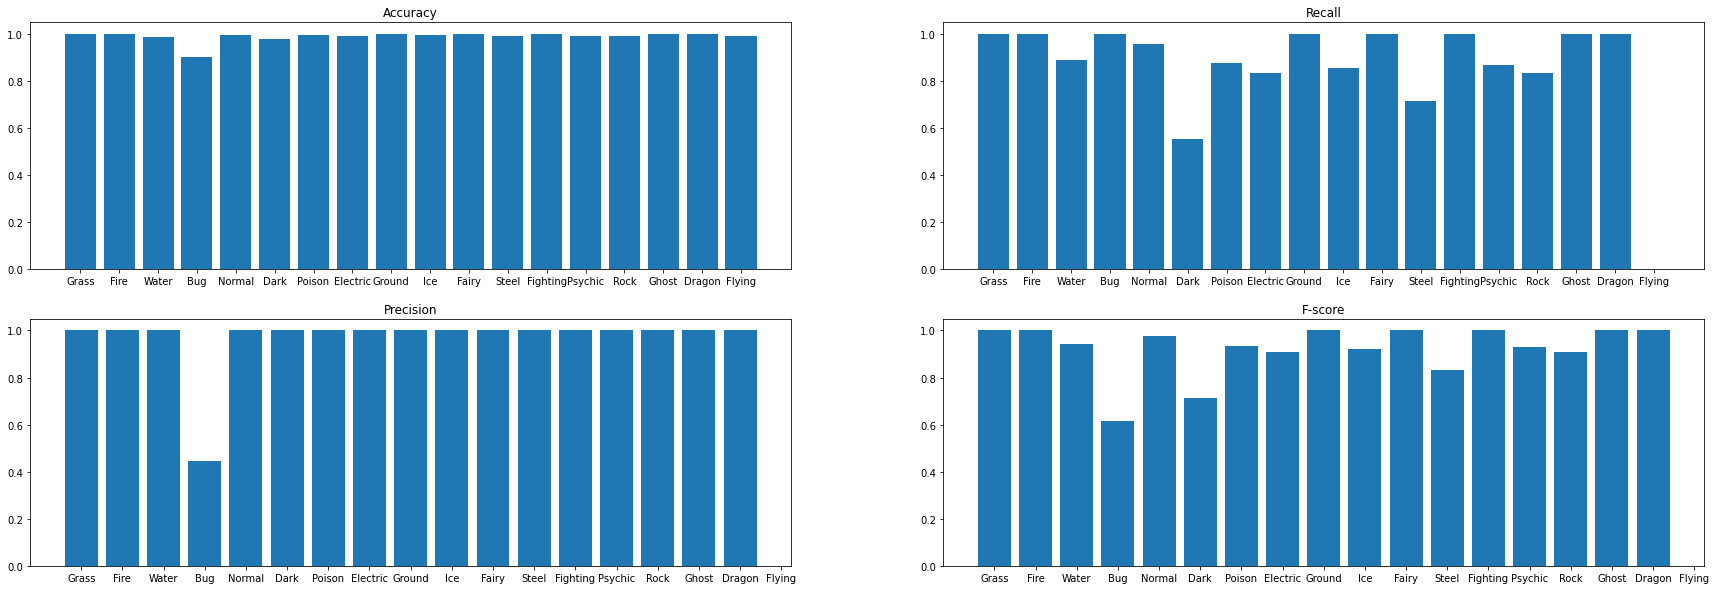

Average Accuracy per class: 0.9891598915989159
Average Recall: 0.8544848937964881
Average Precision: nan
Average F-Score: nan
Overall Accuracy: 0.9024390243902439


In [ ]:
def measure(m, class_labels):
    trueConfMatrix = np.array([row[:] for row in m])
    overallAccuracy = 0
    avgAccuracy = 0
    avgRecall = 0
    avgPrecision = 0
    avgfScore = 0
    
    # Calculate evaluation metrics for each class
    accuracy = []
    recall = []
    precision = []
    fscore = []
    for i in range(len(m[0])):
        TP = m[i][i]
        FN = sum(m[i,:]) - TP
        FP = sum(m[:,i]) - TP
        total = sum(map(sum, m))
        TN =  total - FN - FP - TP
        accuracy.append((TP+TN)/total)
        recall.append(TP/(TP+FN))
        precision.append(TP/(TP+FP))
        fscore.append((2*precision[-1])*recall[-1]/(precision[-1] + recall[-1]))
        overallAccuracy = overallAccuracy + TP
        avgAccuracy = avgAccuracy + ((TP+TN)/total)
        avgRecall = avgRecall + recall[-1]
        avgPrecision = avgPrecision + precision[-1]
        avgfScore = avgfScore + fscore[-1]
    
    # Plot bar plots for each metric
    fig, axs = plt.subplots(2, 2, figsize=(30, 10))
    axs[0, 0].bar(class_labels, accuracy)
    axs[0, 0].set_title('Accuracy')
    axs[0, 1].bar(class_labels, recall)
    axs[0, 1].set_title('Recall')
    axs[1, 0].bar(class_labels, precision)
    axs[1, 0].set_title('Precision')
    axs[1, 1].bar(class_labels, fscore)
    axs[1, 1].set_title('F-score')
    
    # Show the plots
    plt.show()
    
    # Print average values
    print(f'Average Accuracy per class: {avgAccuracy/len(m[0])}')
    print(f'Average Recall: {avgRecall/len(m[0])}')
    print(f'Average Precision: {avgPrecision/len(m[0])}')
    print(f'Average F-Score: {avgfScore/len(m[0])}')
    print(f'Overall Accuracy: {overallAccuracy/sum(map(sum, m))}')


measure(np.array(confusion_matrixNB), class_labels)

Shows plots of the accuracy, precision, recall, and fscore for each class in Naive Bayes

/var/folders/_1/8nc9mlsx6qj2q39564gllkpw0000gn/T/ipykernel_13683/1953348141.py:22: RuntimeWarning: invalid value encountered in long_scalars
  precision.append(TP/(TP+FP))


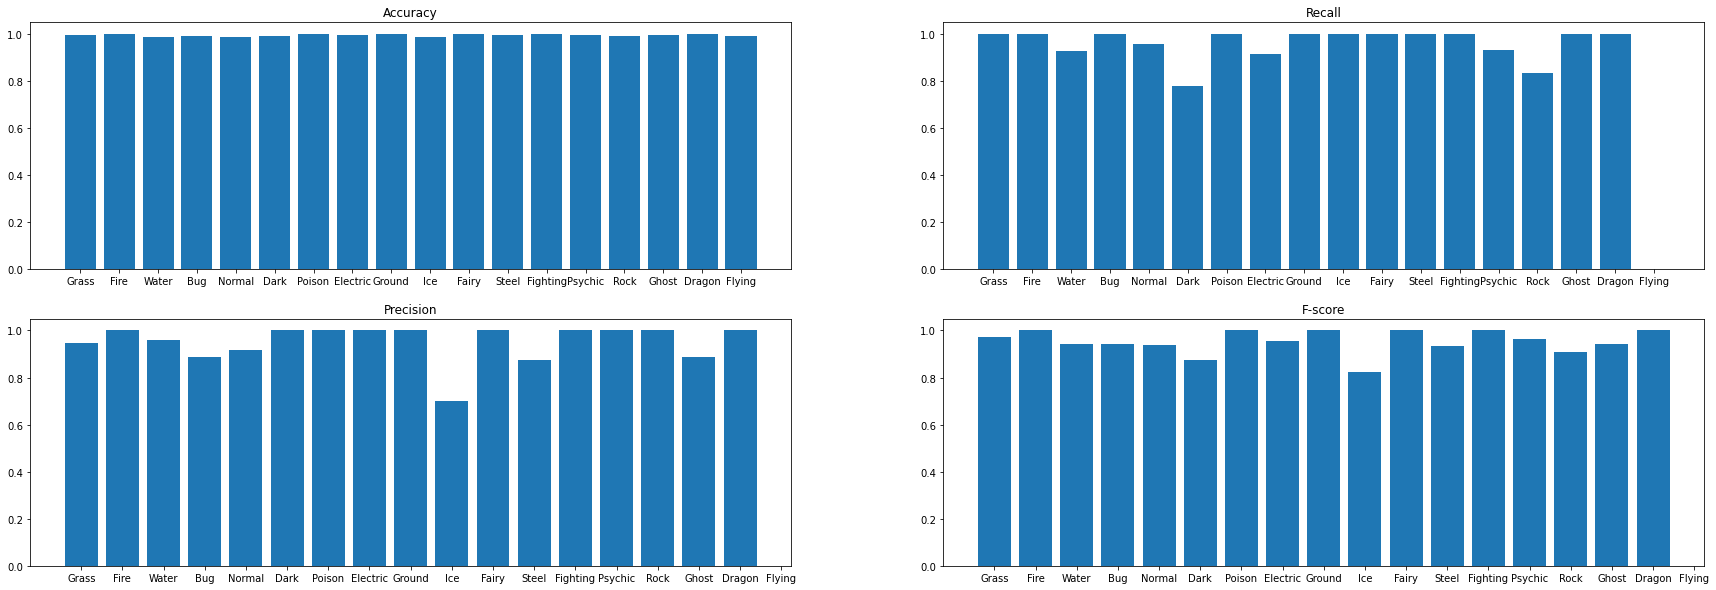

Average Accuracy per class: 0.9940379403794037
Average Recall: 0.9079754875648596
Average Precision: nan
Average F-Score: nan
Overall Accuracy: 0.9463414634146341


In [ ]:
measure(np.array(confusion_matrixKNN), class_labels)

Shows plots of the accuracy, precision, recall, and fscore for each class in Naive Bayes

In this instance, KNN is the better dataset in terms of its accuracy. Naive Bayes still performs relatively well, and is less computationally intensive. We would reccomend the use of KNN for this problem, but it would be much better if you used the sci-kit learn library for KNN as it computes it much faster

## Discussion on Ethical Issues

Pokemon is a video game that takes place in a fictional world. If this algorithm were to be used in this fictional world, it can raise a few issues that would be problematic. First, a pokemon type is one of the biggest factors that determine things like its behaviours, its needs, and the abilities it can learn. If I, a Pokemon trainer were to encounter a pokemon in the wild, and were to misclassify that pokemon's type, I could be in danger. Say I classify it as a Water type when in reality it is a Grass type, I can mistakenly attack it with a pokemon that is weak against it, and put my pokemon in danger. There is also the danger of catching a pokemon and misclassifying it as a different type than it is. This would skew my methods of training my new pokemon, as I am training it as if it is a Grass type, when in reality its a Poison type. This can affect things like its ability to train at a good rate, and your friendship level with that pokemon. 

In a more realistic sense, Pokemon can be compared to animals. If there were a machine learning algorithm meant to classify different species of an animal, or for example, breed of dog or cat, there can be some issues with that as well. Say I had an AI system at home that is used to take are of my pets. If the AI misclassified my dog as a Doberman pinscher, when it is actually a Siberian Husky, it will take care of the dog and cater to it as if it is a Doberman, which is a problem, as Huskies require specific necessities. 


## Bibliography

1. https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420
2. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
3. https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4
4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
5. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
6. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
7. https://medium.com/@rangavamsi5/na%C3%AFve-bayes-algorithm-implementation-from-scratch-in-python-7b2cc39268b9